In [3]:
import pandas as pd
import numpy as np

%matplotlib inline

### Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week


#### Loading the data and setting the DateTimeIndex

In [4]:
data = pd.read_csv('../../assets/dataset/train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [13]:
data_store1 = data[data['Store'] == 1]
data_store1["Dept"].sum()

454749

#### Plot the rolling_mean for `Weekly_Sales`. What general trends do you observe?

/Users/Ross/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


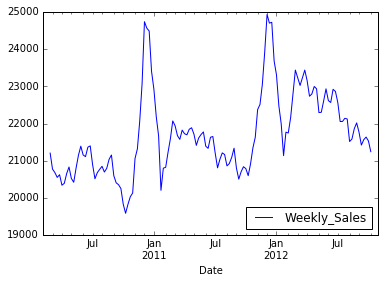

In [37]:
data_store1[['Weekly_Sales']].resample('W').rolling(window=7, center=True).mean().plot()

In [73]:
data_store1 = data_store1[['Weekly_Sales']].resample('W').sum()

#### Compute the 1, 2, 52 autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [74]:
data_store1.Weekly_Sales.autocorr(lag=1)

0.30215827941131262

In [75]:
data_store1.Weekly_Sales.autocorr(lag=2)

0.12741313055390097

In [76]:
data_store1.Weekly_Sales.autocorr(lag=52)

0.89537602947770079

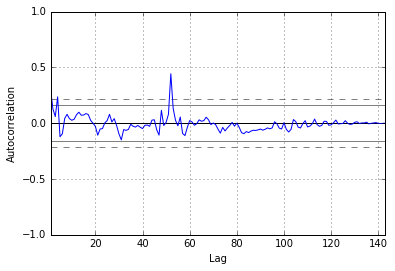

In [77]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(data_store1.Weekly_Sales)

#### Split the weekly sales data in a training and test set - using 75% of the data for training

In [78]:
data_store1_weekly = data_store1['Weekly_Sales']
data_training = data_store1_weekly[0:7682]
data_test = data_store1_weekly[7682:]

#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [79]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA

In [80]:
#model = ARIMA(store1_sales_data, (2, 0, 2)).fit()
#print model.summary()

model = ARIMA(data_training, (1, 0, 0)).fit()
print model.summary()

                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(1, 0)   Log Likelihood               -1905.530
Method:                       css-mle   S.D. of innovations         148170.139
Date:                Mon, 09 Jan 2017   AIC                           3817.060
Time:                        20:46:53   BIC                           3825.949
Sample:                    02-07-2010   HQIC                          3820.672
                         - 10-28-2012                                         
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.555e+06   1.77e+04     88.059      0.000      1.52e+06  1.59e+06
ar.L1.Weekly_Sales     0.3005      0.080      3.780      0.000         0.145     0.456
                    

#### Plot the residuals - where are their significant errors.

In [84]:
#mean_absolute_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
mean_absolute_error(data_test, data_training)

ValueError: Found arrays with inconsistent numbers of samples: [  0 143]

In [ ]:
# TODO

#### Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set.

In [ ]:
# TODO

In [ ]:
# TODO

#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.

In [ ]:
# TODO